In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2 as cv

%matplotlib inline

In [7]:
df = pd.read_csv('frames_label.csv')
df = df.fillna(0)
df

,file,label
0,./frames/S001_v001/S001_v001_frame_1.jpg,0.0
1,./frames/S001_v001/S001_v001_frame_2.jpg,0.0
2,./frames/S001_v001/S001_v001_frame_3.jpg,0.0
3,./frames/S001_v001/S001_v001_frame_4.jpg,0.0
4,./frames/S001_v001/S001_v001_frame_5.jpg,0.0
...,...,...
15899,./frames/S020_v012/S020_v012_frame_52.jpg,0.0
15900,./frames/S020_v012/S020_v012_frame_53.jpg,0.0
15901,./frames/S020_v012/S020_v012_frame_54.jpg,0.0
15902,./frames/S020_v012/S020_v012_frame_55.jpg,0.0


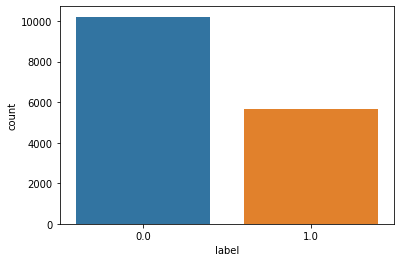

In [8]:
sns.countplot(df['label'])

In [16]:
cough_df = df[df['label'] == 1]
not_cough_df = df[df['label'] == 0]

cough_df.reset_index(drop=True, inplace=True)
not_cough_df.reset_index(drop=True, inplace=True)

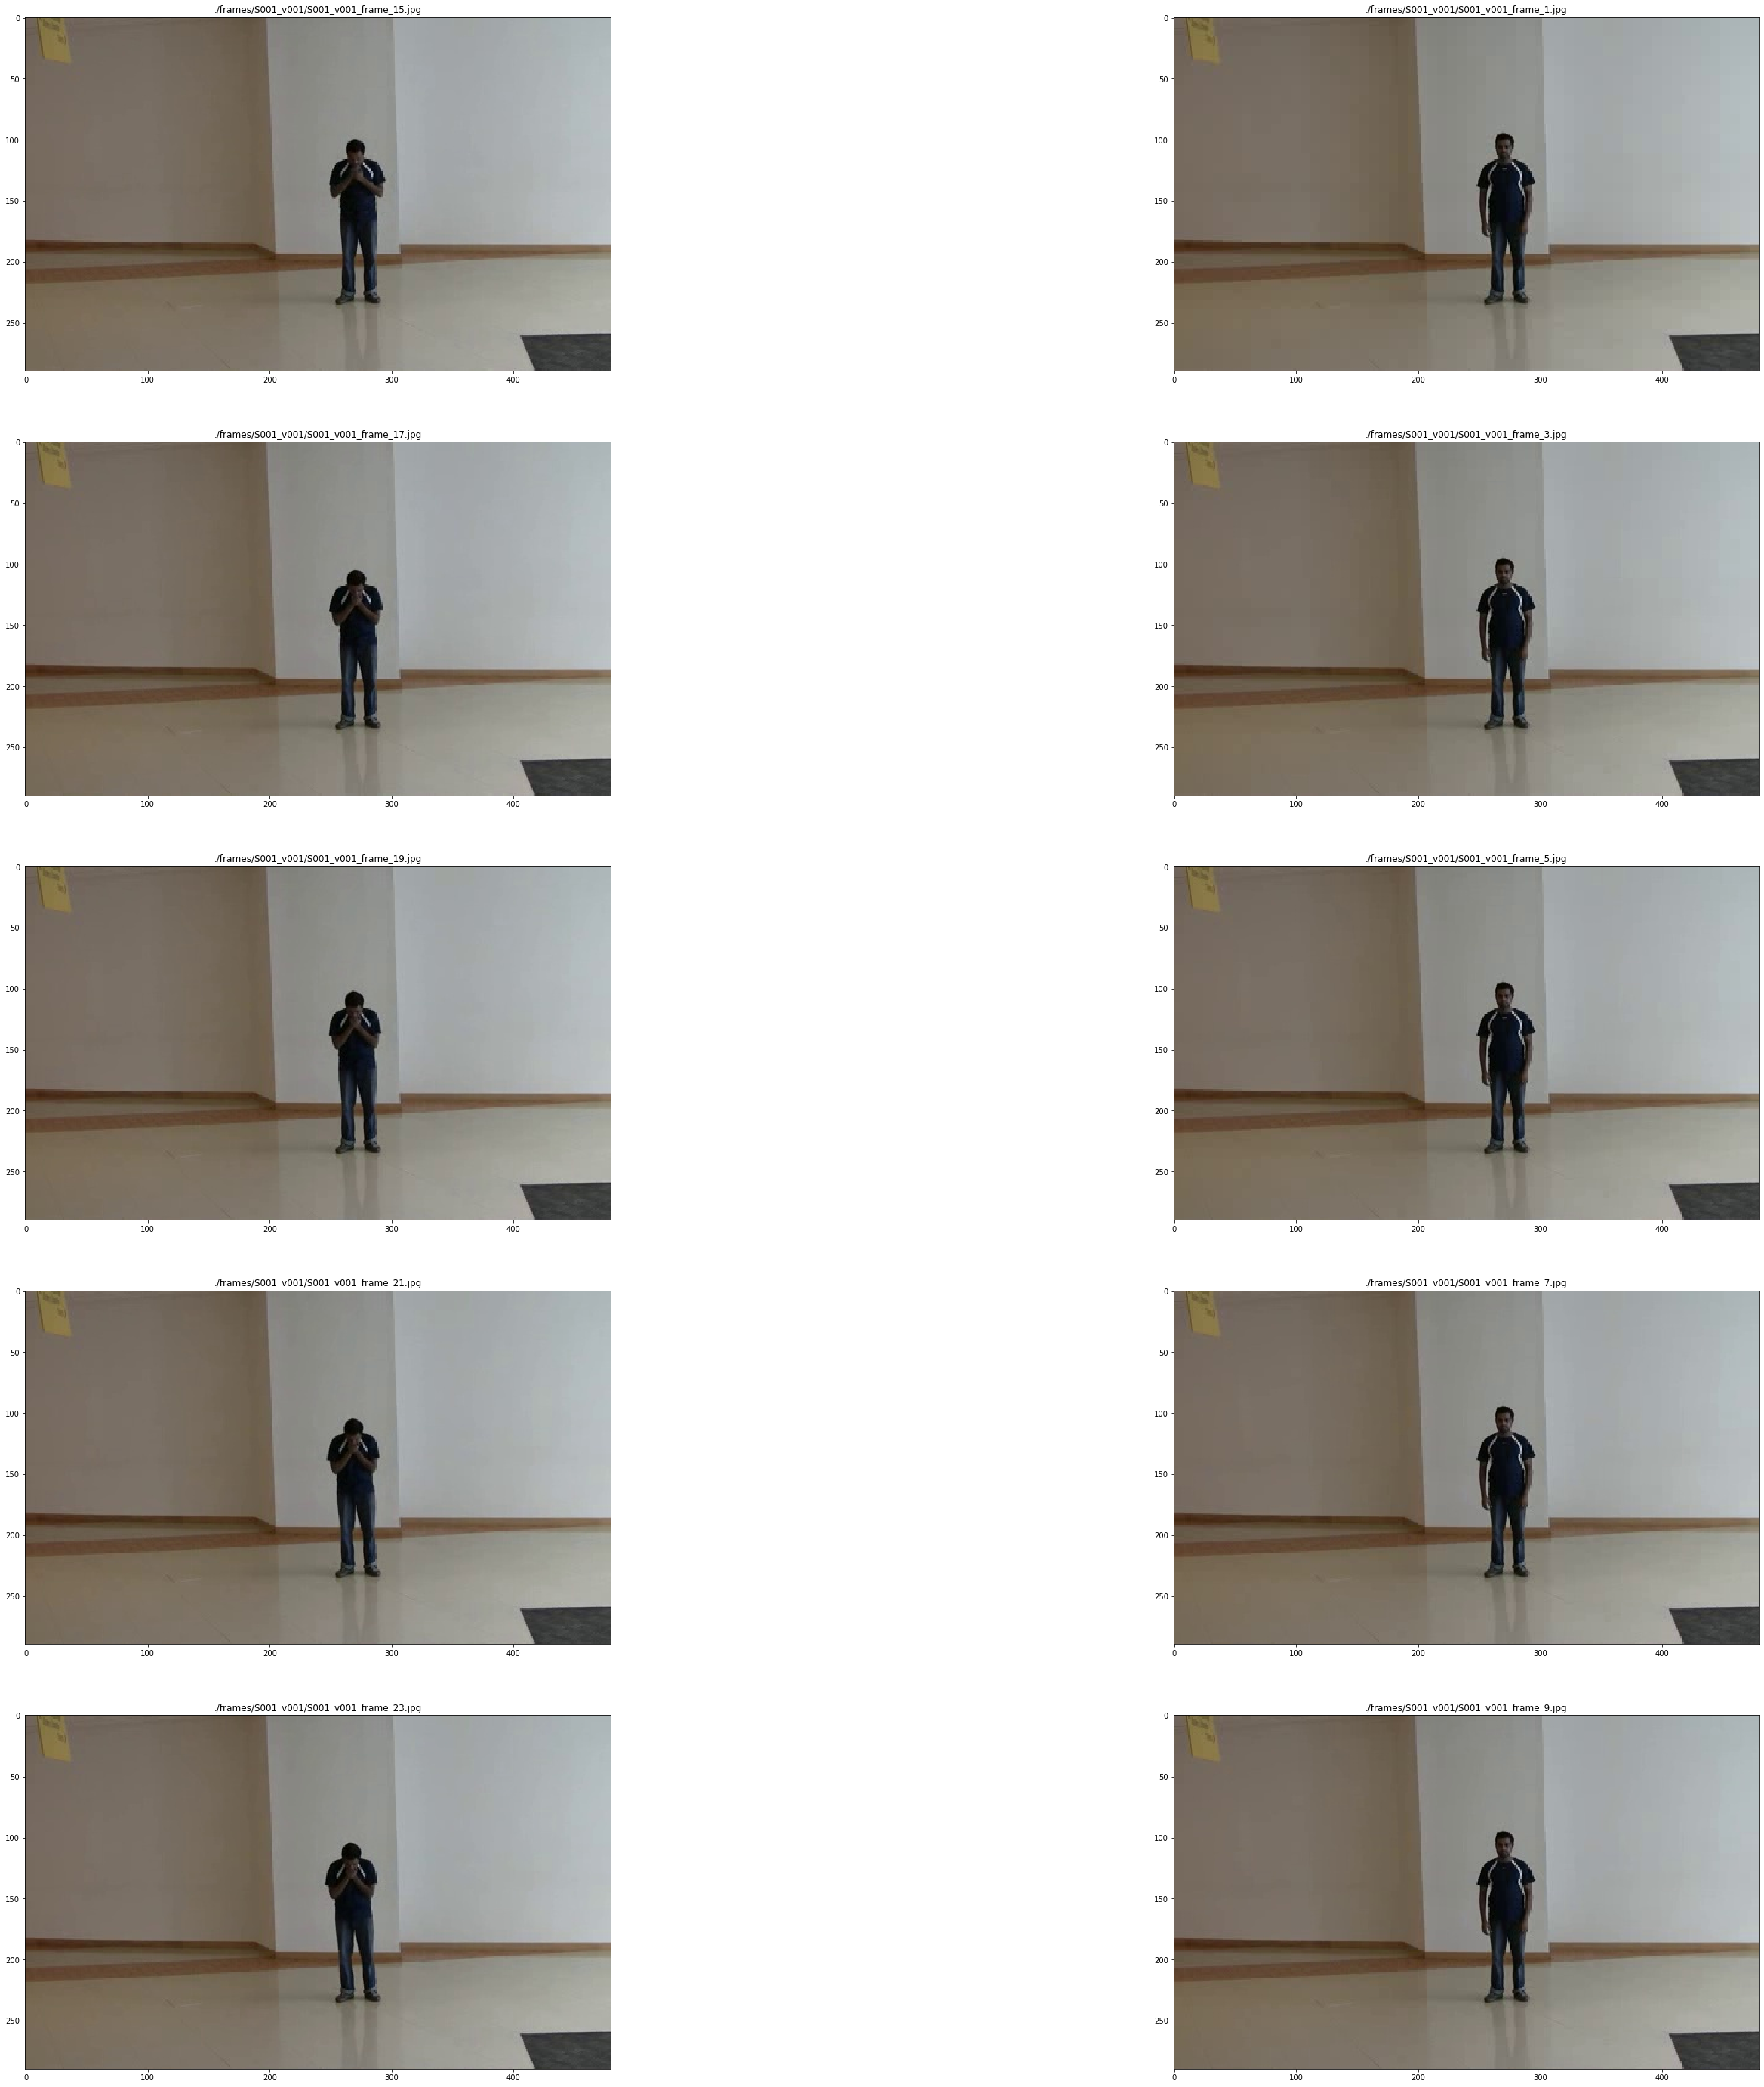

In [24]:
plt.figure(figsize=(50,50))
for i in range(0,10,2):
    plt.subplot(5,2,i+1)
    im = cv.cvtColor(cv.imread(cough_df['file'][i]), cv.COLOR_BGR2RGB)
    plt.imshow(im)
    plt.title(cough_df['file'][i])
    plt.subplot(5,2,i+2)
    im = cv.cvtColor(cv.imread(not_cough_df['file'][i]), cv.COLOR_BGR2RGB)
    plt.imshow(im)
    plt.title(not_cough_df['file'][i])

In [63]:
split_index = 13768

train_df = df.iloc[0:split_index]
test_df = df.iloc[split_index:]

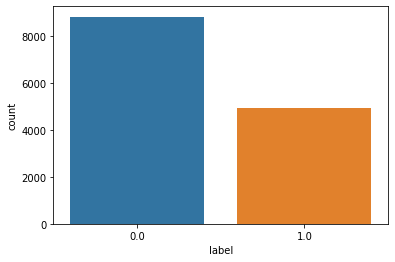

In [64]:
sns.countplot(train_df['label'])

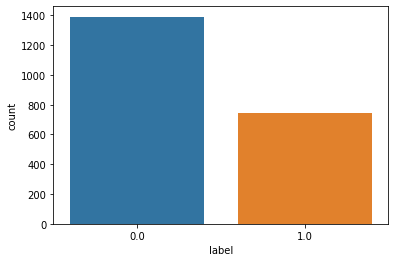

In [65]:
sns.countplot(test_df['label'])

In [66]:
train_df = train_df.sample(frac=1).reset_index(drop=True)

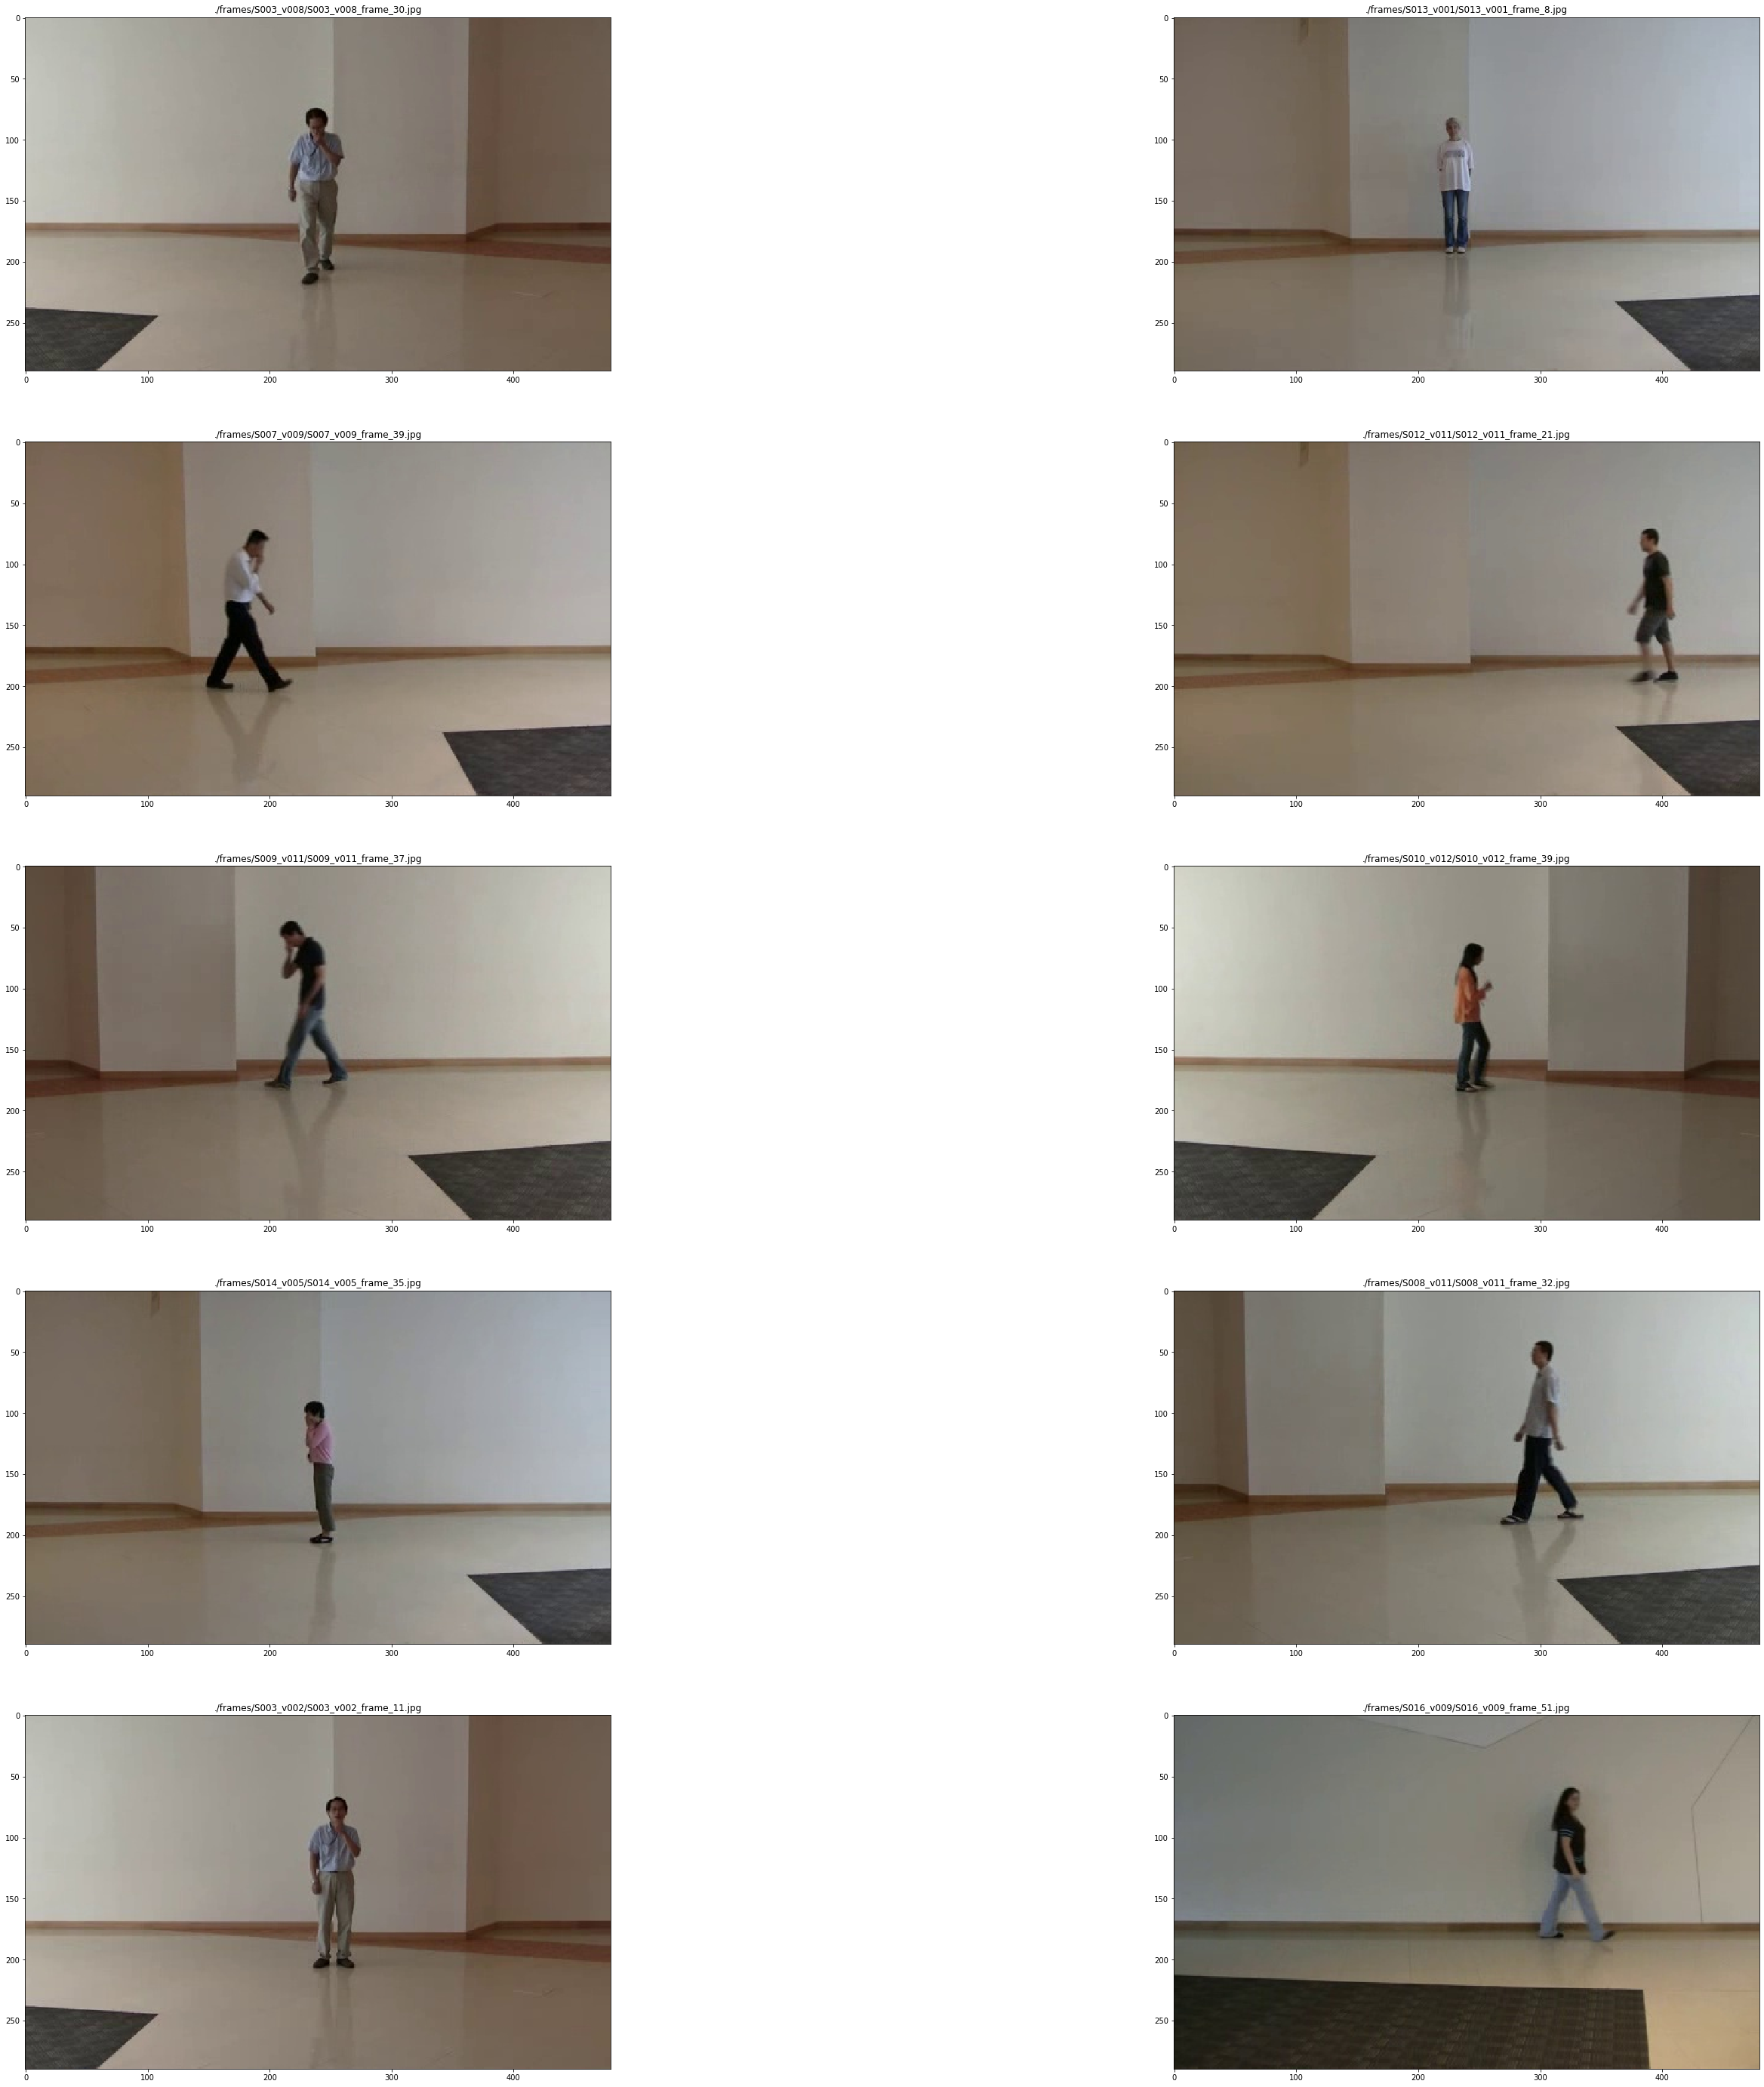

In [73]:
plt.figure(figsize=(50,50))
for i in range(0,10,2):
    plt.subplot(5,2,i+1)
    path = train_df[train_df['label'] == 1]['file'].reset_index(drop=True)[i]
    im = cv.imread(path)
    im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
    plt.imshow(im)
    plt.title(path)
    
    plt.subplot(5,2,i+2)
    path = train_df[train_df['label'] == 0]['file'].reset_index(drop=True)[i]
    im = cv.imread(path)
    im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
    plt.imshow(im)
    plt.title(path)